In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [6]:
df = pd.read_csv('/content/marketing_data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
df.drop("CUST_ID",axis=1,inplace=True)

In [8]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [9]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.duplicated().any()

False

In [11]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


<Axes: xlabel='BALANCE'>

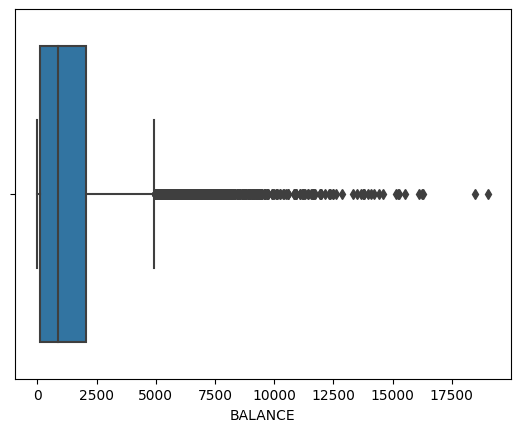

In [12]:
sns.boxplot(x=df["BALANCE"])

<Axes: xlabel='PURCHASES'>

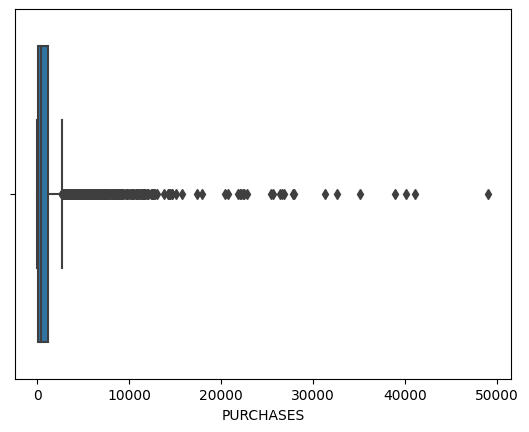

In [13]:
sns.boxplot(x=df["PURCHASES"])

In [14]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [15]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


<ipython-input-16-37fcb6099c80>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-16-37fcb6099c80>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "b",

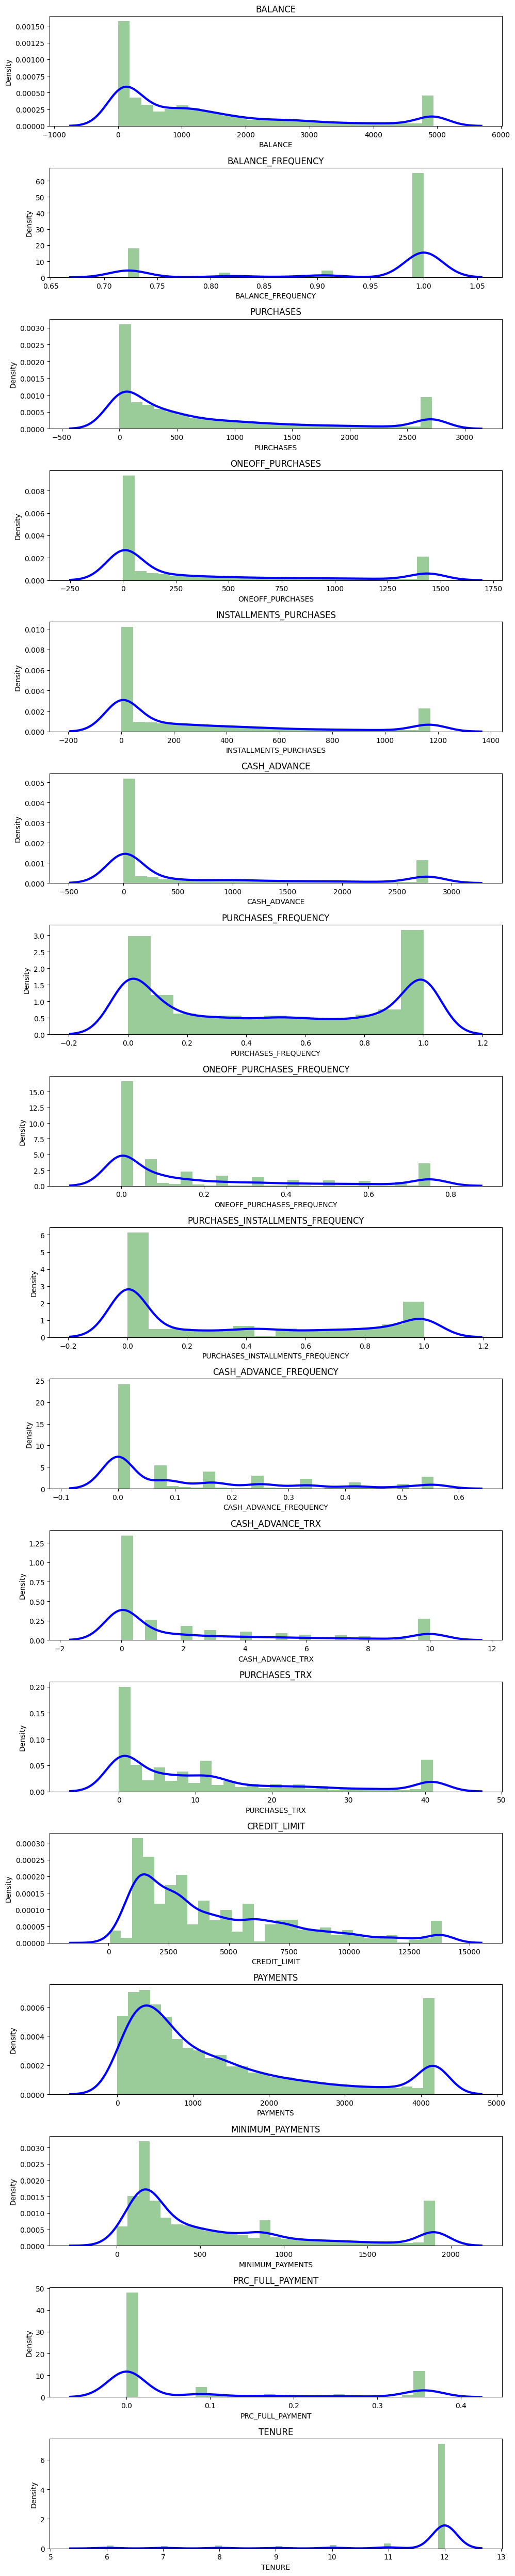

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    #draw distribution plot of each columns
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

<Axes: >

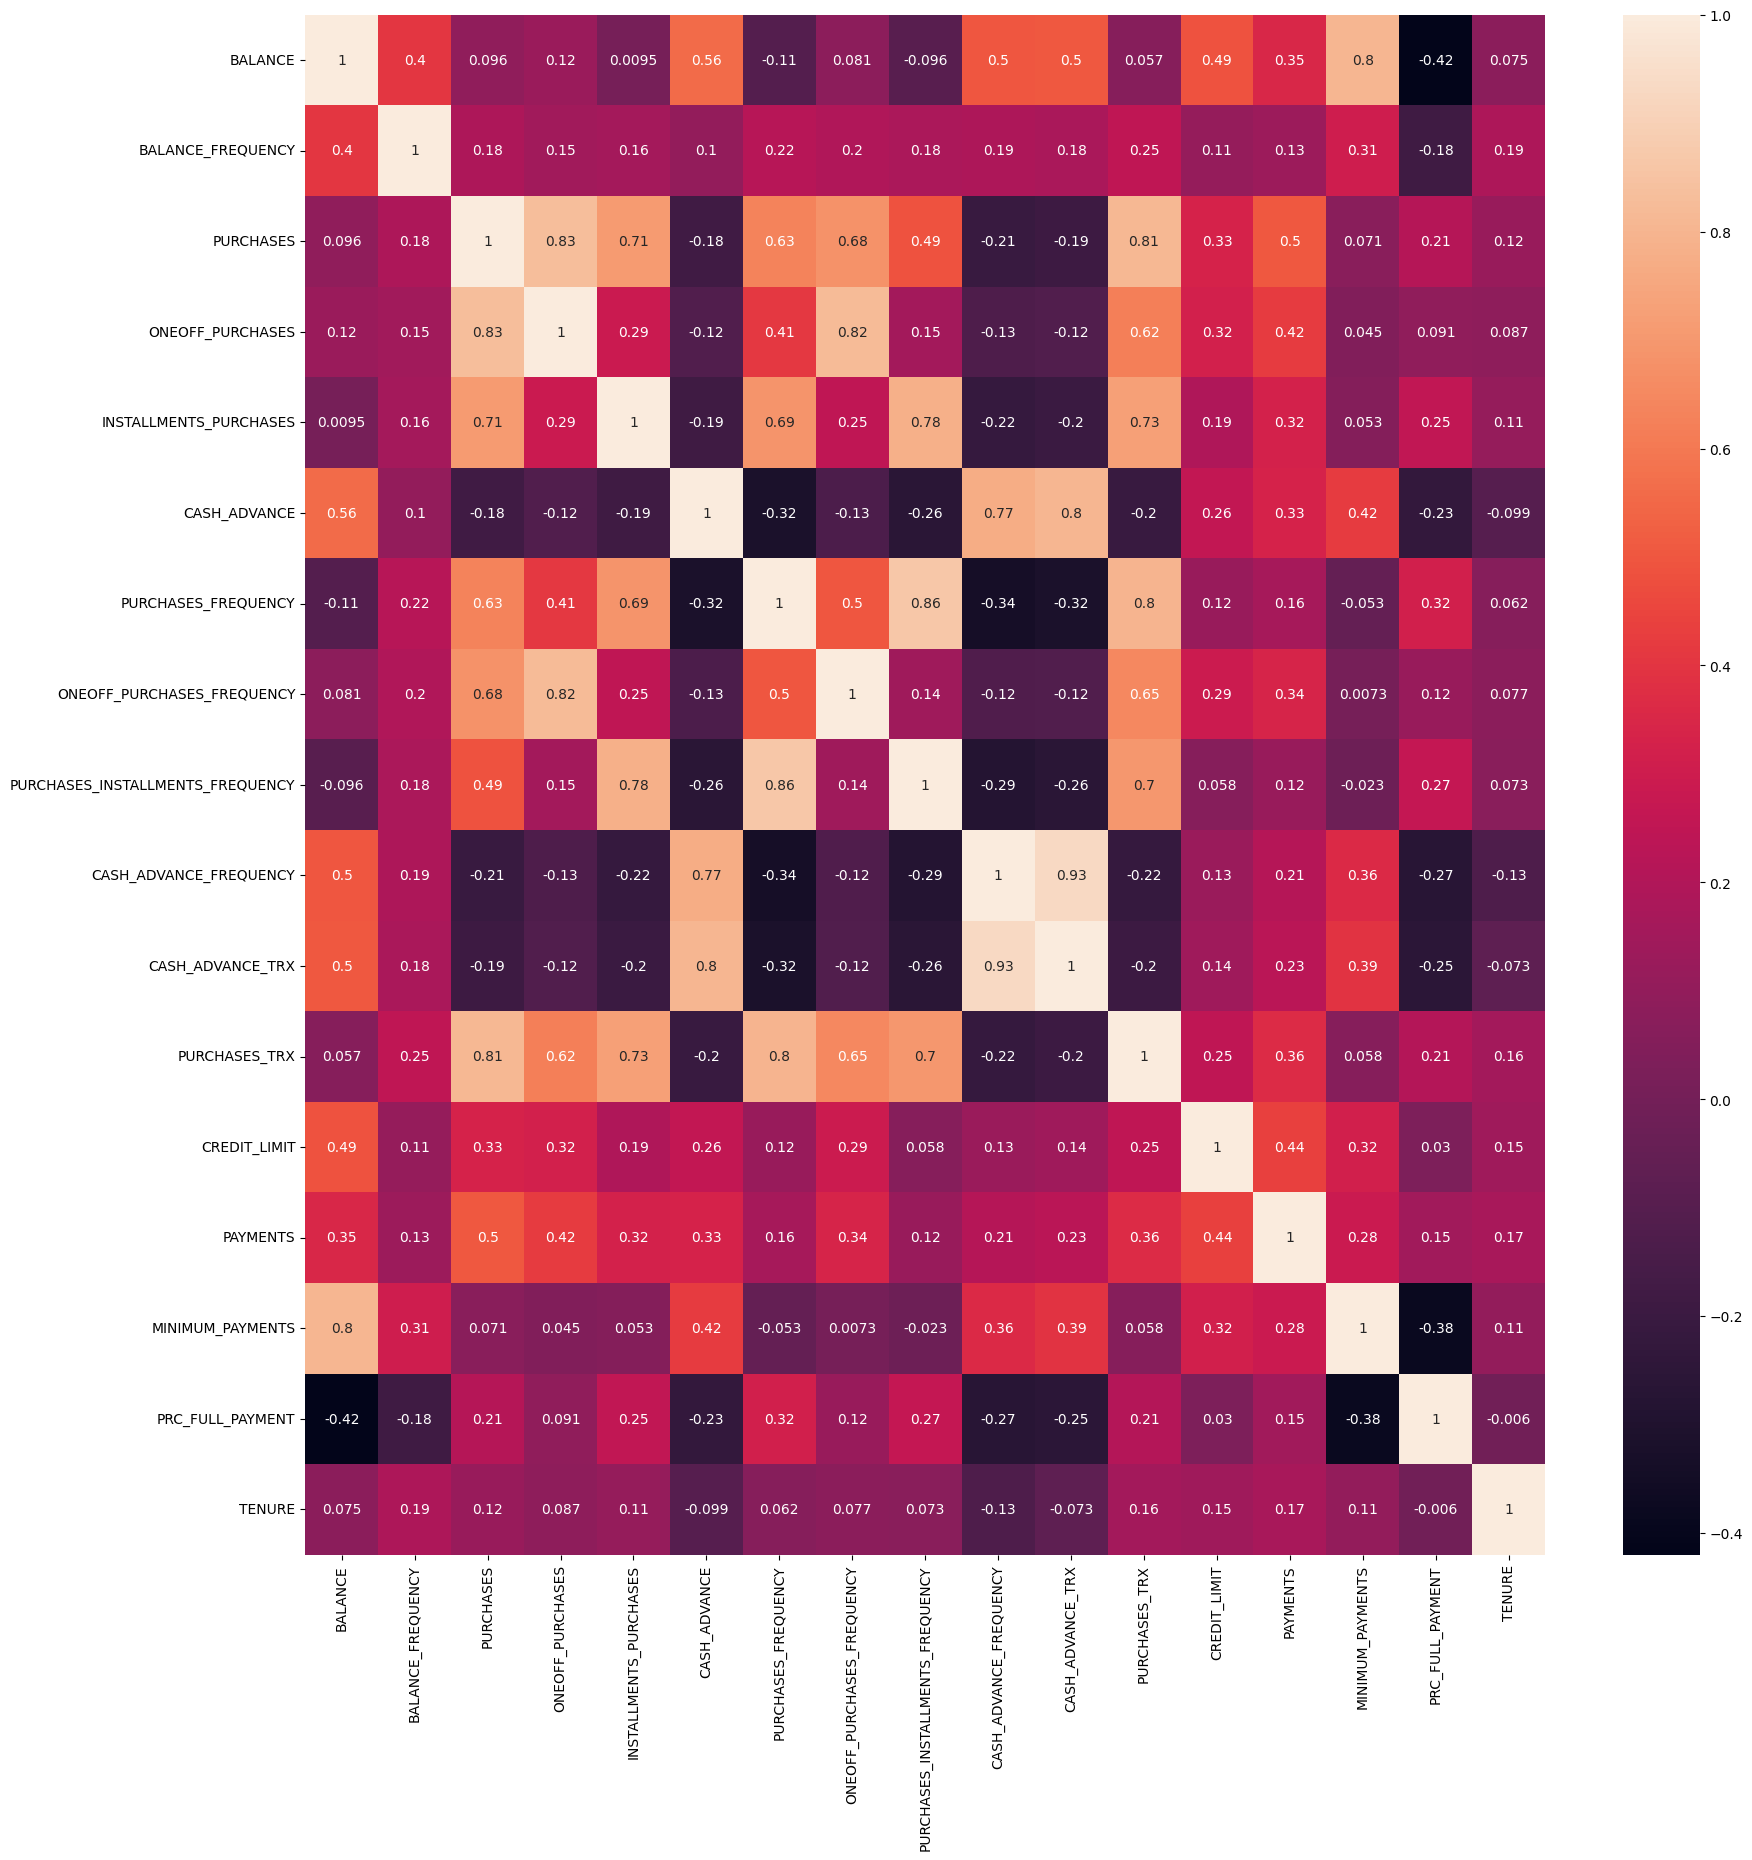

In [17]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot=True)

We will use yellowbrick method to find the optimal number of clusters.

In [18]:
df1 = df.copy()
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [19]:
from yellowbrick.cluster import KElbowVisualizer

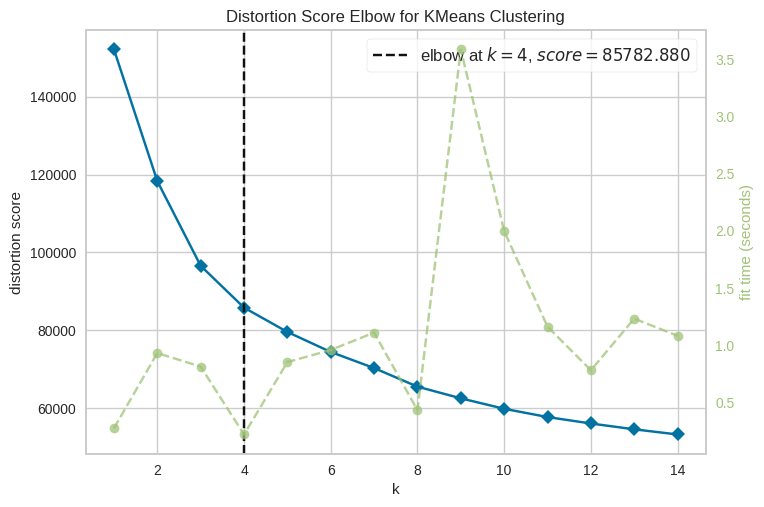

In [20]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,15))
visualizer.fit(df1_scaled)
visualizer.poof()
plt.show()

In [21]:
kmeans = KMeans(4)
kmeans.fit(df1_scaled)
labels = kmeans.labels_

In [22]:
kmeans.cluster_centers_.shape
#(number of cluster points, number of columns/features)
# 4 since we are training with 4 clusters

(4, 17)

In [23]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
cluster_centers
#centroids for each of the different features

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.300754,0.431642,1.675630,1.608046,0.986737,-0.257140,1.017183,1.510890,0.681692,-0.301829,-0.281923,1.507939,0.702268,0.934767,0.152298,0.280511,0.258844
1,-0.593110,-0.030139,-0.038678,-0.489842,0.601639,-0.574191,0.908669,-0.415847,1.053828,-0.588271,-0.572738,0.283304,-0.369221,-0.409700,-0.369195,0.579188,-0.042419
2,1.115159,0.321530,-0.512572,-0.368172,-0.486211,1.496883,-0.664923,-0.364365,-0.568915,1.451427,1.505529,-0.550773,0.484862,0.479640,0.877677,-0.416581,-0.105405
3,-0.362989,-0.371696,-0.544717,-0.291407,-0.632440,-0.299457,-0.753577,-0.293089,-0.731421,-0.243086,-0.292555,-0.651375,-0.373288,-0.461298,-0.307303,-0.298372,-0.046004


In [24]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
# creating another df again
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1852.904041,0.979489,2210.841569,1177.347522,686.451506,415.725113,0.898595,0.571038,0.635359,0.073945,1.419605,31.288703,6795.476281,2536.795374,680.827599,0.126104,11.863718
1,478.630082,0.928242,703.132446,103.659482,533.890991,99.162317,0.855043,0.078461,0.783256,0.024486,0.425688,15.318349,3170.020411,825.645063,382.528945,0.167503,11.460550
2,3105.013413,0.967270,286.349735,165.929558,102.929021,2167.045455,0.223485,0.091622,0.138336,0.376674,7.528555,4.441209,6059.866300,1957.539420,1095.749966,0.029481,11.376260
3,832.431083,0.890337,258.078887,205.217480,44.998988,373.473793,0.187904,0.109844,0.073752,0.084088,1.383268,3.129266,3156.259455,759.973716,417.931607,0.045866,11.455754


In [25]:
y_kmeans = kmeans.fit_predict(df1_scaled)
y_kmeans

array([1, 2, 3, ..., 0, 1, 1], dtype=int32)

In [26]:
# concate main dataframe with the cluster labels
creditcard_df_cluster = pd.concat([df1, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
